In [47]:
import pickle
import gensim.downloader as api
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import colorcet
import seaborn as sns
from nltk import FreqDist

In [2]:
with open("../data/concs_labeled.pickle", "rb") as f:
    concs_labeled = pickle.load(f)

In [28]:
concs = [conc[0] for conc in concs_labeled]
labels = [conc[1] for conc in concs_labeled]

In [56]:
w2v = KeyedVectors.load("../data/large_data/w2v_news300.model")

In [57]:
w2v.wmdistance(concs[0], concs[1])

1.1935132969667122

In [ ]:
%%time
# create a NumPy array of concatenated sentences
concs_array = np.array(concs)

# create an empty NumPy array of the correct size
distance_matrix = np.zeros((len(concs_array), len(concs_array)))

# use a nested for loop to calculate the WMD distance between each pair of sentences
for i in range(len(concs_array)):
    for j in range(len(concs_array)):
        distance_matrix[i, j] = w2v.wmdistance(concs_array[i], concs_array[j])

<timed exec>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [19]:
with open("../data/large_data/distance_matrix.pickle", "wb") as f:
    pickle.dump(distance_matrix, f)

In [4]:
with open("../data/large_data/distance_matrix.pickle", "rb") as f:
    distance_matrix = pickle.load(f)

In [33]:
unique_labels = list(set(labels))
unique_labels

['inclusive',
 'neoliberal',
 'radical',
 'authoritatian',
 'exclusive',
 'nativist',
 'moderate',
 'right-wing',
 'nationalist',
 'left-wing']

In [52]:
palette = sns.color_palette("Paired", len(unique_labels))
labels_ordered = [tup[0] for tup in FreqDist(labels).most_common()]
color_dict = dict(zip(labels_ordered, palette))
labels_colors = [color_dict[l] for l in labels]

In [49]:
tsne = TSNE(n_components=2)
distances_2d = tsne.fit_transform(distance_matrix)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


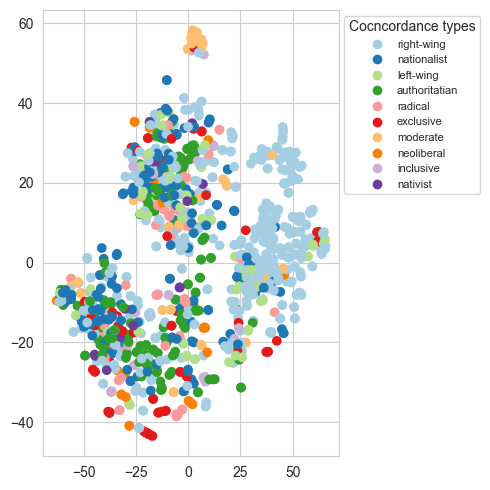

In [54]:
fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
ax.scatter(distances_2d[:, 0], distances_2d[:, 1],c=labels_colors[:1000])

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in palette]
ax.legend(markers, labels_ordered, numpoints=1,  title="Cocncordance types", fontsize=8, bbox_to_anchor=(1,1), loc="upper left")
